# Plot CMIP ZOS fields

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_dir = '../outputs/'

In [3]:
!ls {data_dir}

CMIP5_SeaLevel_rcp85_zostoga_1986-2100.nc
CMIP5_zos_rcp85_ACCESS1-0_2006_2008.nc
CMIP5_zos_rcp85_ACCESS1-0_2006_2101.nc
CMIP5_zos_rcp85_ACCESS1-0_2098_2100.nc
CMIP5_zos_rcp85_ACCESS1-0_2099_2101.nc
CMIP5_zos_rcp85_CCSM4_2006_2008.nc
CMIP5_zos_rcp85_CCSM4_2006_2101.nc
CMIP5_zos_rcp85_CCSM4_2098_2100.nc
CMIP5_zos_rcp85_CCSM4_2099_2101.nc
CMIP5_zos_rcp85_CMCC-CESM_2006_2008.nc
CMIP5_zos_rcp85_CMCC-CESM_2098_2100.nc
CMIP5_zos_rcp85_CMCC-CESM_2099_2101.nc
CMIP5_zos_rcp85_CMCC-CMS_2006_2008.nc
CMIP5_zos_rcp85_CMCC-CMS_2098_2100.nc
CMIP5_zos_rcp85_CMCC-CMS_2099_2101.nc
CMIP5_zos_rcp85_CMCC-CM_2006_2008.nc
CMIP5_zos_rcp85_CMCC-CM_2098_2100.nc
CMIP5_zos_rcp85_CMCC-CM_2099_2101.nc
CMIP5_zos_rcp85_CNRM-CM5_2006_2008.nc
CMIP5_zos_rcp85_CNRM-CM5_2098_2100.nc
CMIP5_zos_rcp85_CNRM-CM5_2099_2101.nc
CMIP5_zos_rcp85_CSIRO-Mk3-6-0_2006_2008.nc
CMIP5_zos_rcp85_CSIRO-Mk3-6-0_2006_2101.nc
CMIP5_zos_rcp85_CSIRO-Mk3-6-0_2098_2100.nc
CMIP5_zos_rcp85_CSIRO-Mk3-6-0_2099_2101.nc
CMIP5_zos_rcp85_CanESM2_2006_2008.

In [11]:
def plot_all_models(ds):
    nb_cols = 3
    nb_rows = int(np.ceil(len(ds.model)/nb_cols))
    fig, axes = plt.subplots(nrows=nb_rows, ncols=nb_cols, figsize=(14,30))

    for idx, mod in enumerate(ds.model):
        ds['CorrectedReggrided_zos'].isel(time=0,model=idx).plot(
            ax=axes[int(idx/nb_cols),idx%nb_cols])
    fig.tight_layout()

### Look at CMIP5 fields

In [30]:
cmip5_zos = xr.open_mfdataset(data_dir+'CMIP5_zos_rcp85_*_2006_2008.nc')
cmip5_zos.CorrectedReggrided_zos_rcp85

<xarray.DataArray 'CorrectedReggrided_zos_rcp85' (model: 30, time: 2, lat: 180, lon: 360)>
dask.array<shape=(30, 2, 180, 360), dtype=float64, chunksize=(1, 2, 180, 360)>
Coordinates:
  * time     (time) float64 2.006e+03 2.008e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
  * model    (model) object 'ACCESS1-0' 'CCSM4' ... 'bcc-csm1-1' 'inmcm4'
Attributes:
    units:    cm

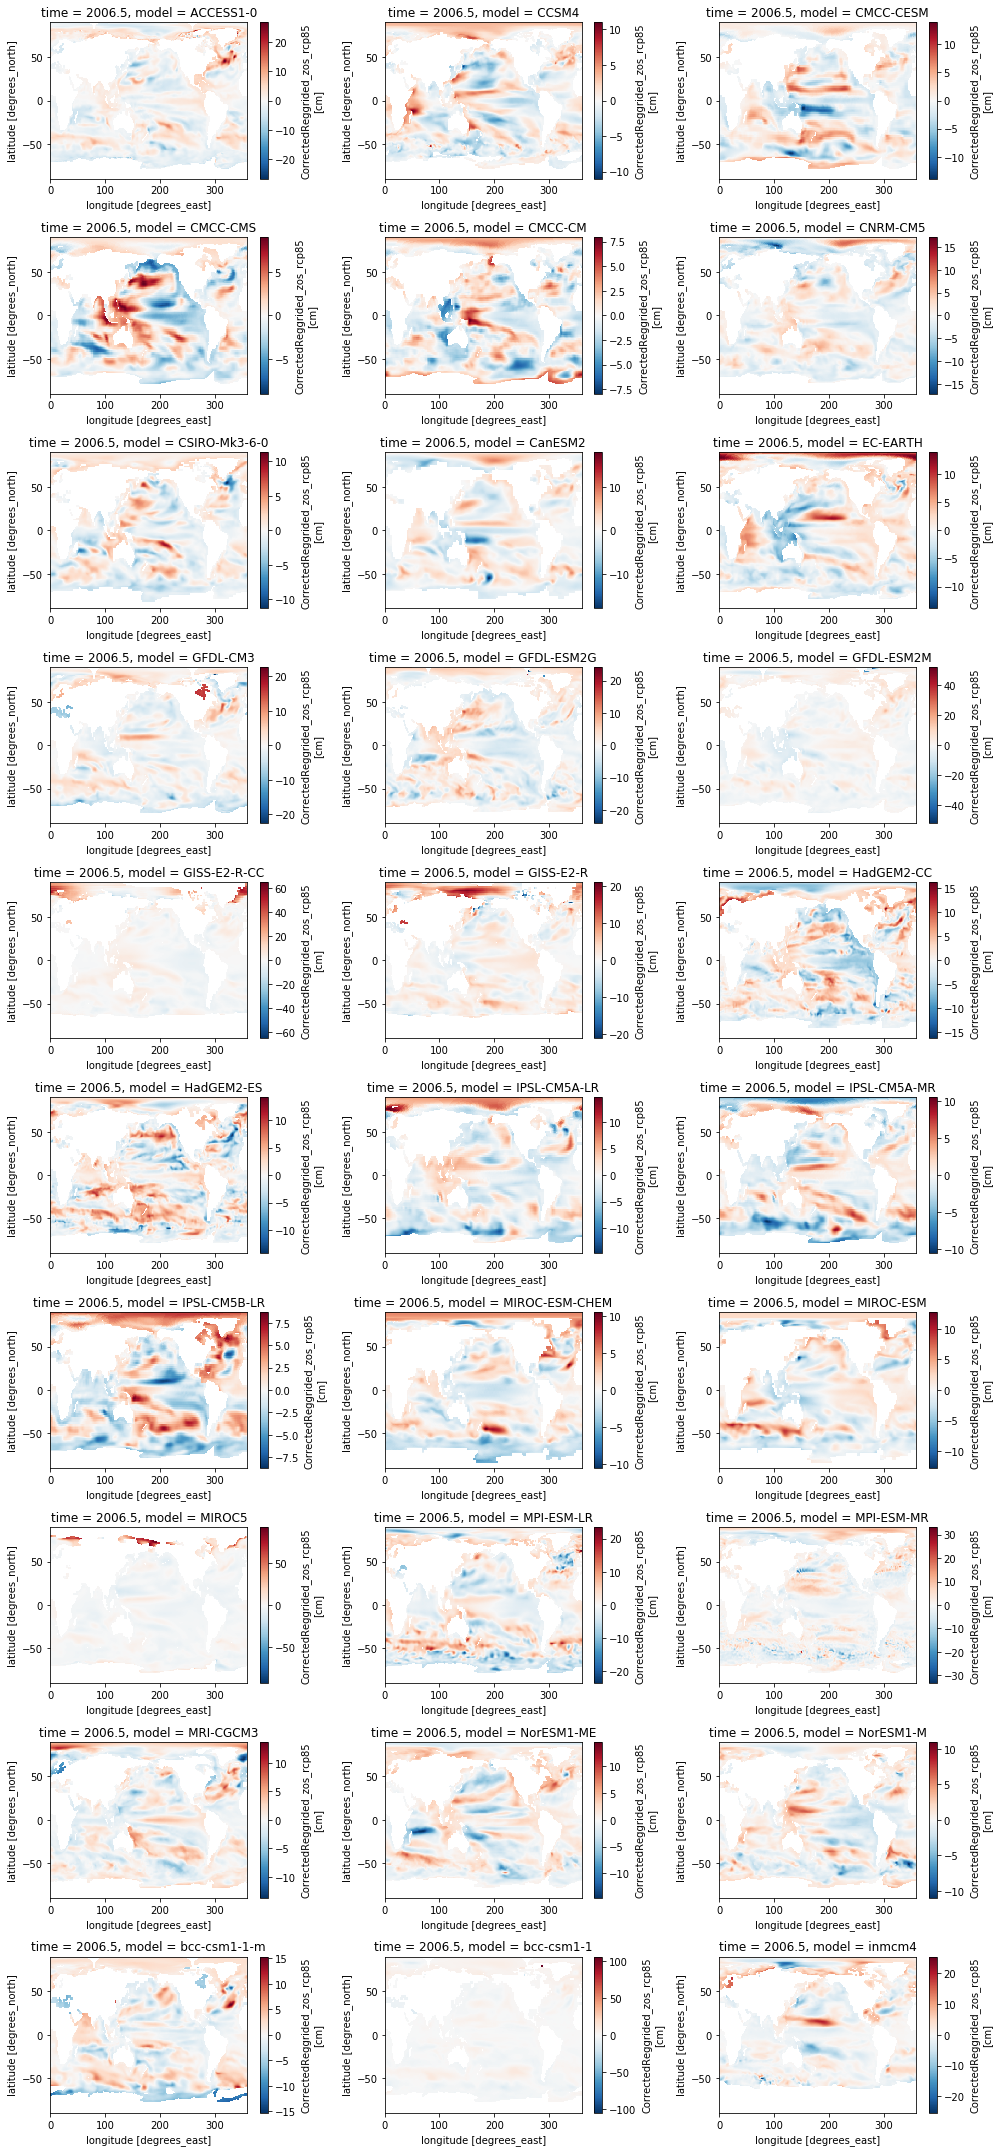

In [31]:
plot_all_models(cmip5_zos)

In [4]:
cmip5_zos_2100 = xr.open_mfdataset(data_dir+'CMIP5_zos_rcp85_*_2098_2100.nc')
cmip5_zos_2100

<xarray.Dataset>
Dimensions:                 (lat: 180, lon: 360, model: 30, time: 2)
Coordinates:
  * time                    (time) float64 2.098e+03 2.1e+03
  * lat                     (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                     (lon) float64 0.5 1.5 2.5 3.5 ... 357.5 358.5 359.5
  * model                   (model) object 'ACCESS1-0' 'CCSM4' ... 'inmcm4'
Data variables:
    CorrectedReggrided_zos  (model, time, lat, lon) float64 dask.array<chunksize=(1, 2, 180, 360), meta=np.ndarray>
Attributes:
    source_file:        This NetCDF file was built from ComputeOceanDynmicSea...
    creation_date:      2020-07-29 16:59
    emission_scenario:  rcp85

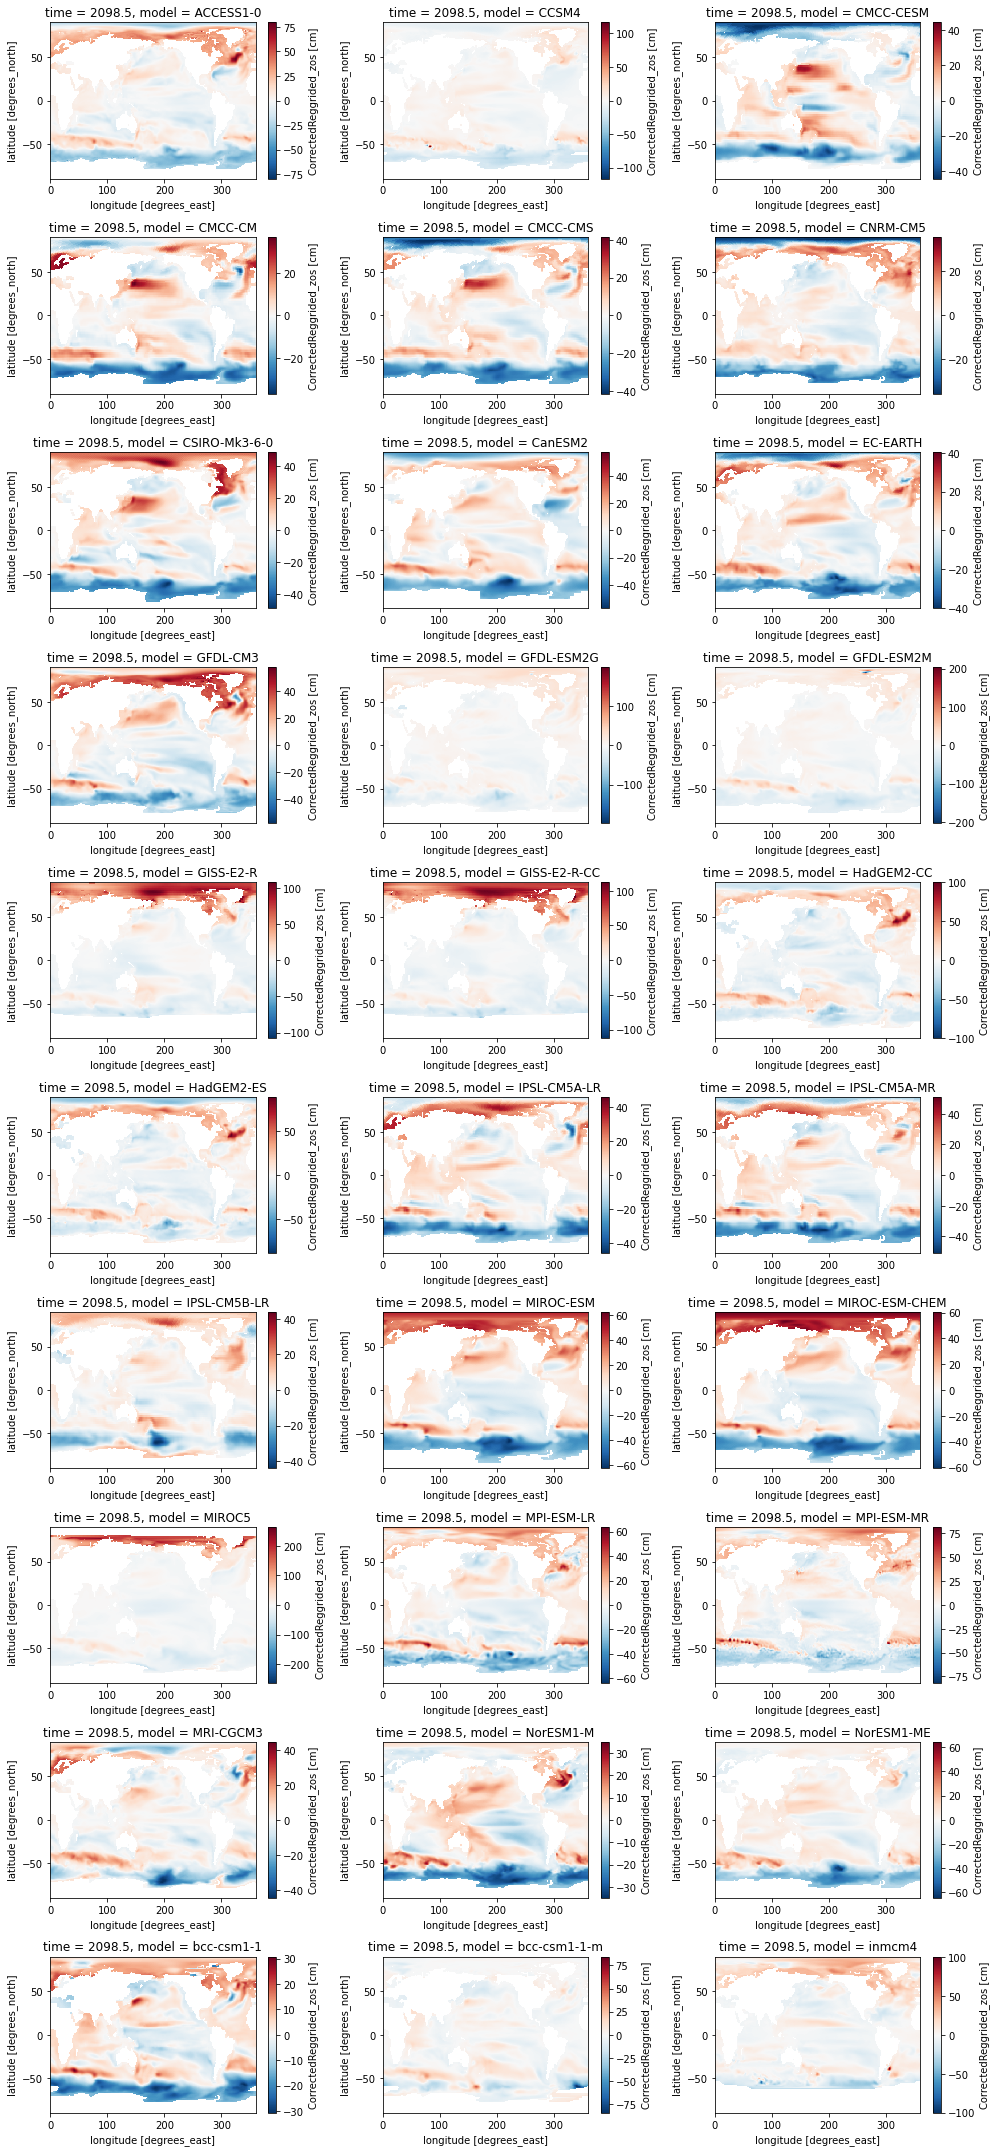

In [5]:
plot_all_models(cmip5_zos_2100)

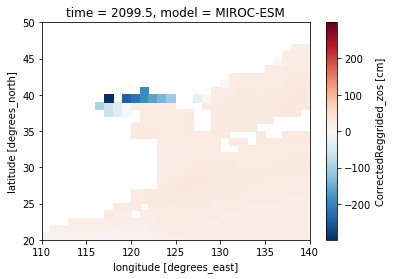

In [53]:
#'GISS-E2-R-CC', 'GISS-E2-R'
cmip5_zos_2100.CorrectedReggrided_zos.sel(model='MIROC-ESM', time=2099.5, 
                                           lat=slice(20,50), lon=slice(110,140)).plot() 

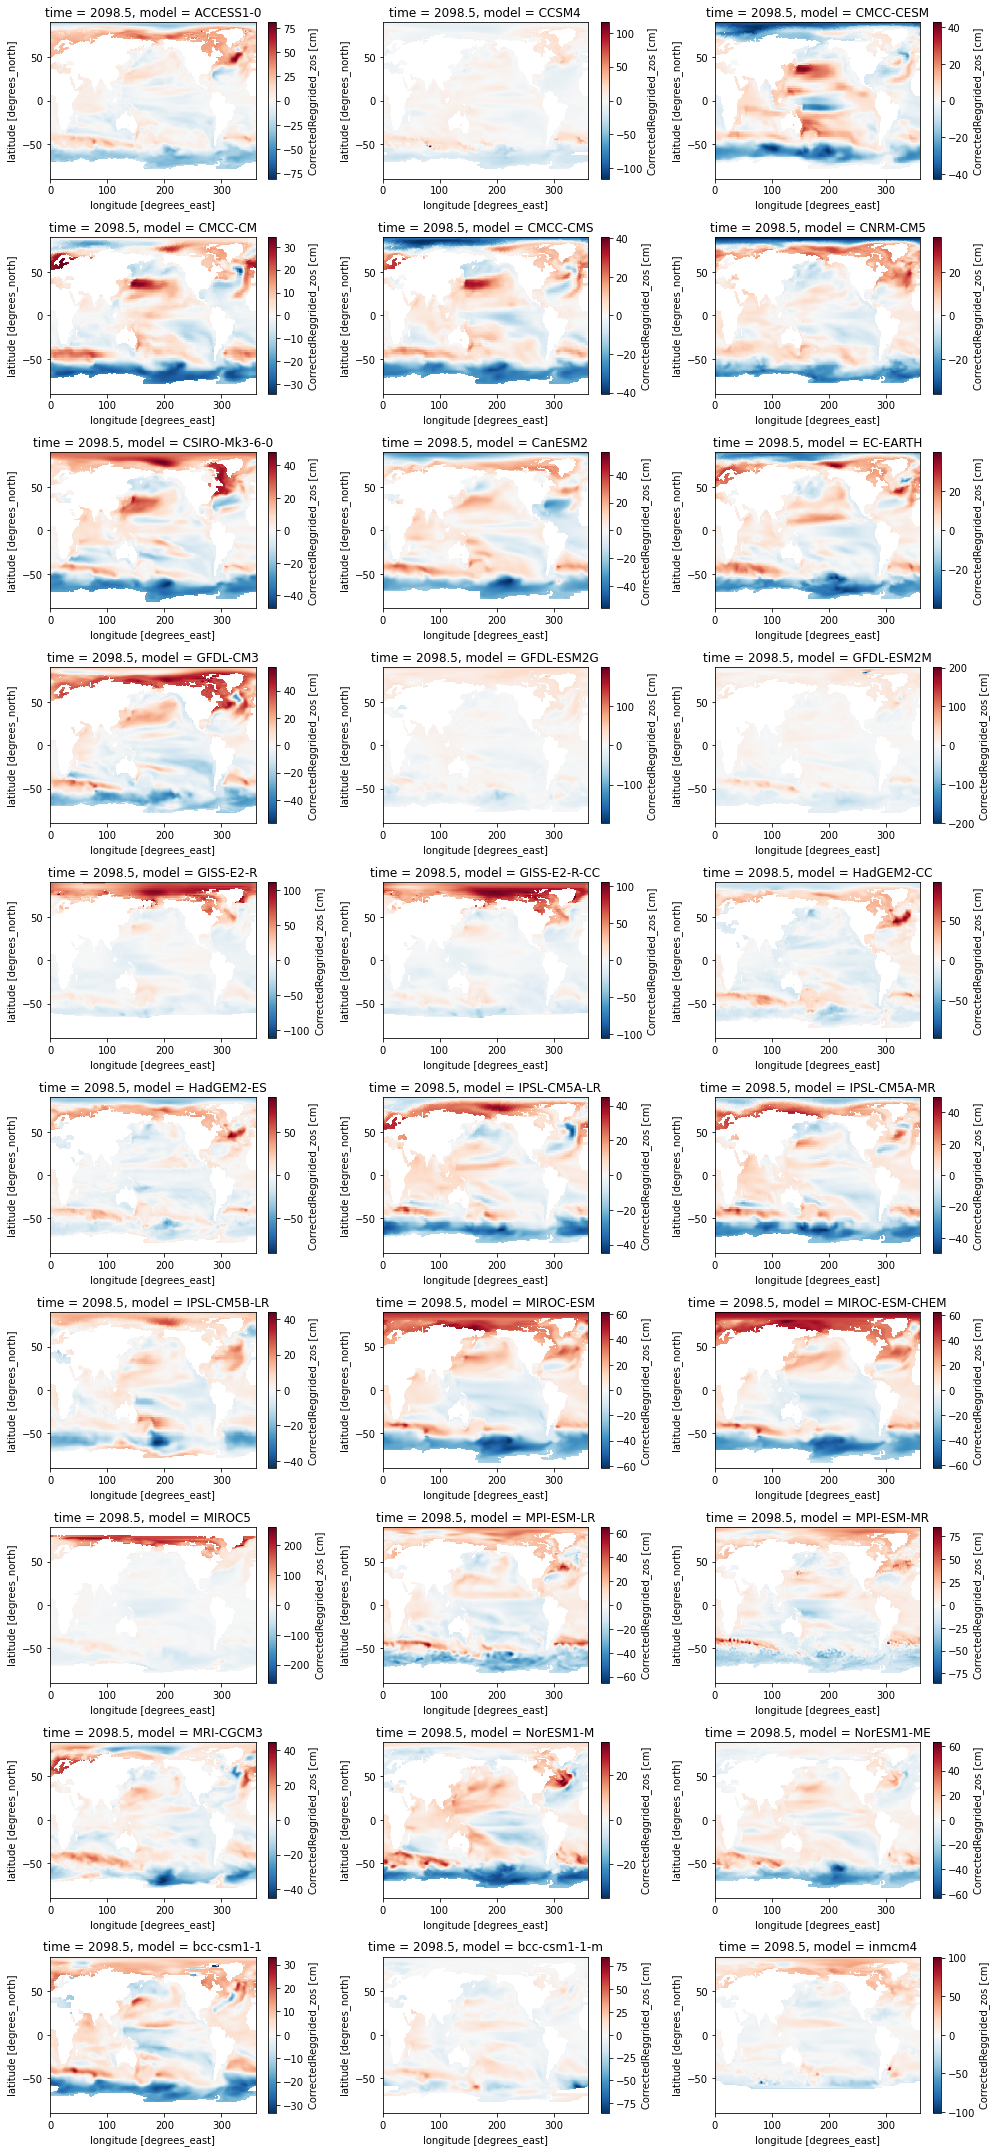

In [6]:
cmip5_zos_test2100 = xr.open_mfdataset(data_dir+'TEST_CMIP5_zos_rcp85_*_2098_2100.nc')
plot_all_models(cmip5_zos_test2100)

In [7]:
diff_ds = cmip5_zos_test2100 - cmip5_zos_2100
plot_all_models(diff_ds)

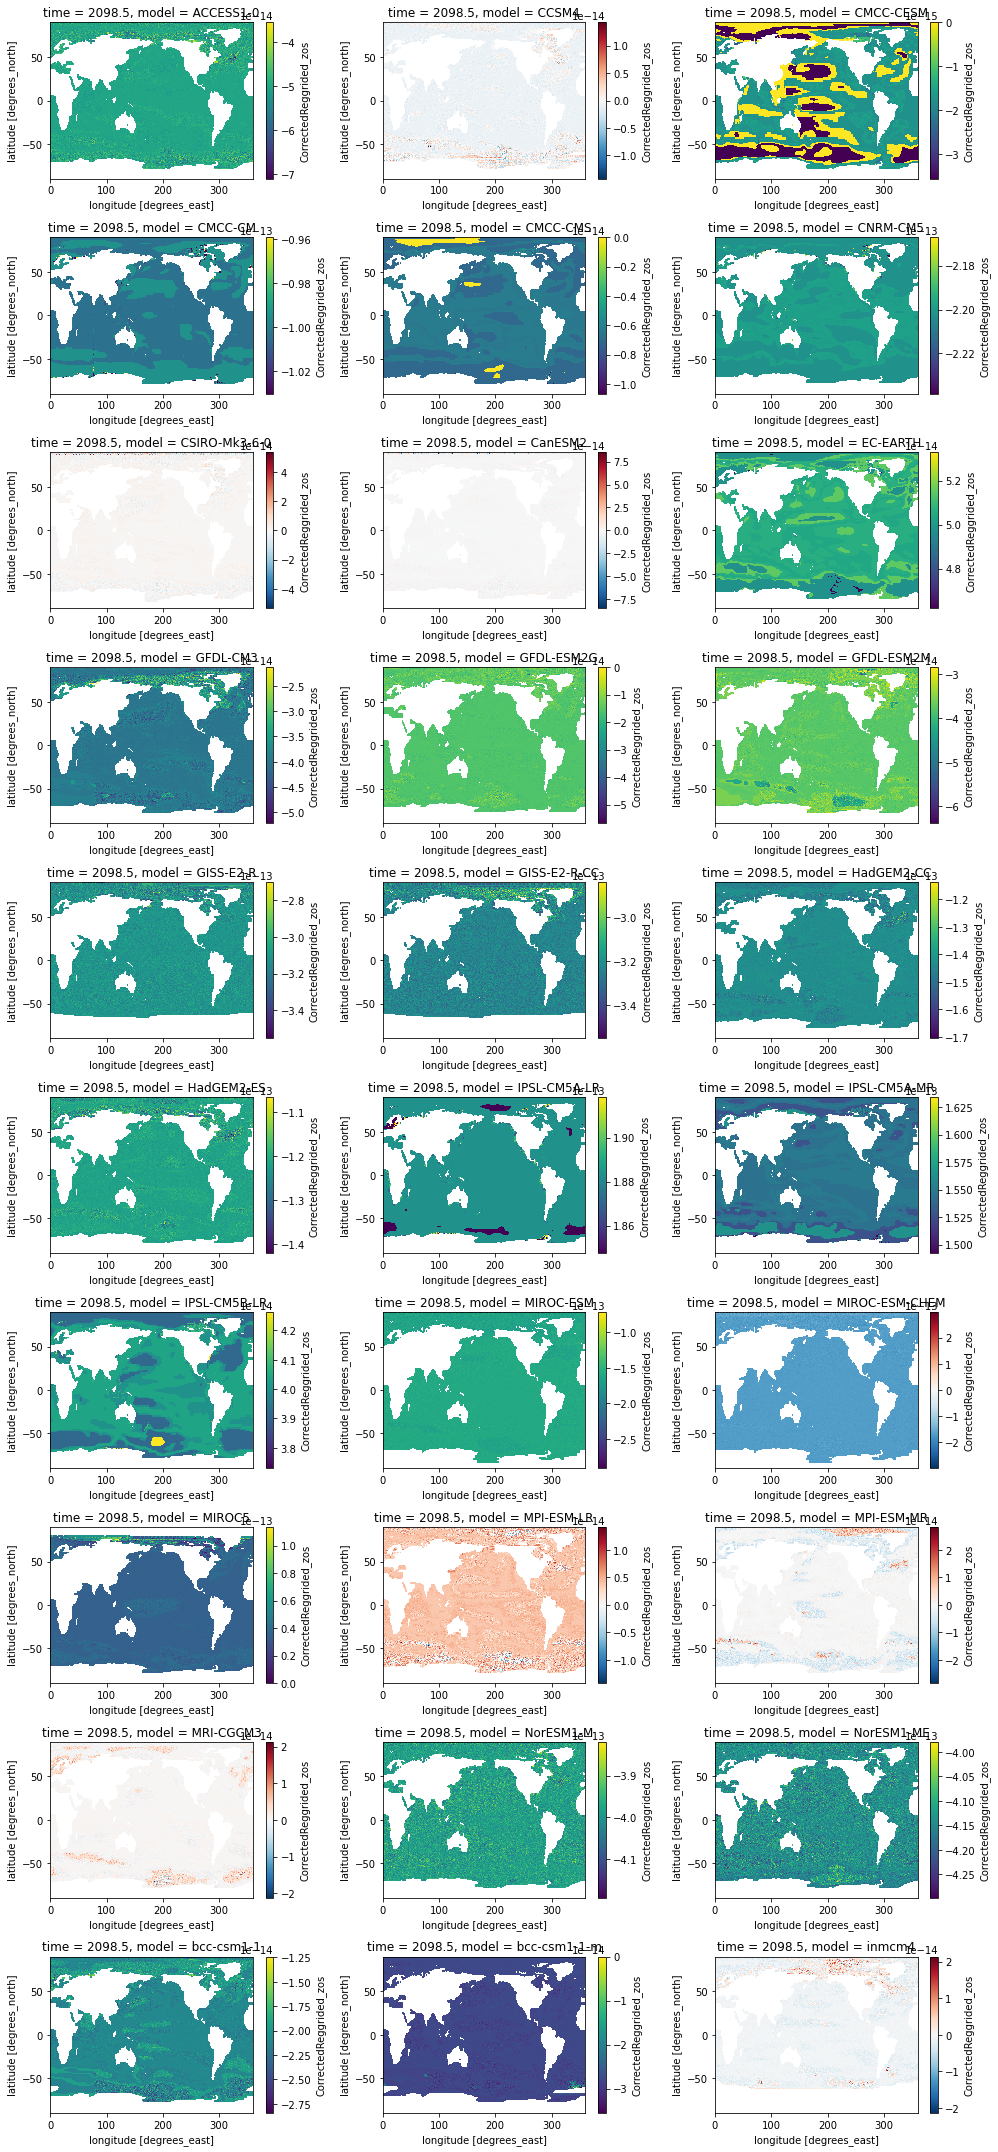

In [12]:
cmip5_zos_test2_2100 = xr.open_mfdataset(data_dir+'TEST2_CMIP5_zos_rcp85_*_2098_2100.nc')
diff2_ds = cmip5_zos_test2_2100 - cmip5_zos_test2100
plot_all_models(diff2_ds)